# Medical Imaging & Big Data

## 1. Introduction, Libraries, Setups
[testo]

## Environment for using GPU (per Matteo)

Runna i codici in quest'ordine. Se hai installato TensorFlow sul base environment di Python, ti consiglio di fgare un virtual environment per non far casini fra PyTorch e TF. Io sono riuscito a usare python 3.12

1) scaricati e installa CUDA 12.1 (NO ALTRE VERSIONI) da qui https://developer.nvidia.com/cuda-12-1-0-download-archive
2) scaricati il pacchetto cuDDN 9.2.1 da qui https://developer.nvidia.com/cudnn-downloads?target_os=Windows&target_arch=x86_64&target_version=Agnostic&cuda_version=12
3) unzippa il cuDNN e inserisci i contenuti delle cartelle *lib*, *bin* e *include* nelle rispettive cartelle lib, bin e include del percorso "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1"
4) le variabili dovrebbero essere già tutte su PATH, in caso non lo fossero segui questa guida: https://medium.com/thesecmaster/step-by-step-guide-to-setup-pytorch-for-your-gpu-on-windows-10-11-524d58cf2744

In [7]:
#Per installare pytorch eccetera
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#questo'

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#Per importare pytorch e verificare se è disponibile la GPU
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using", device, "device")

Using cuda device


In [10]:
#Per impostare la GPU come default nel caso sopra non funzioni (fai uncomment)
#torch.set_default_device('cuda')

In [ ]:
#%pip install pydicom numpy matplotlib pandas gdcm
%pip install torch
#!conda install -c conda-forge gdcm -y

## 2. Dataset Preprocessing

Total images preprocessed: 10719


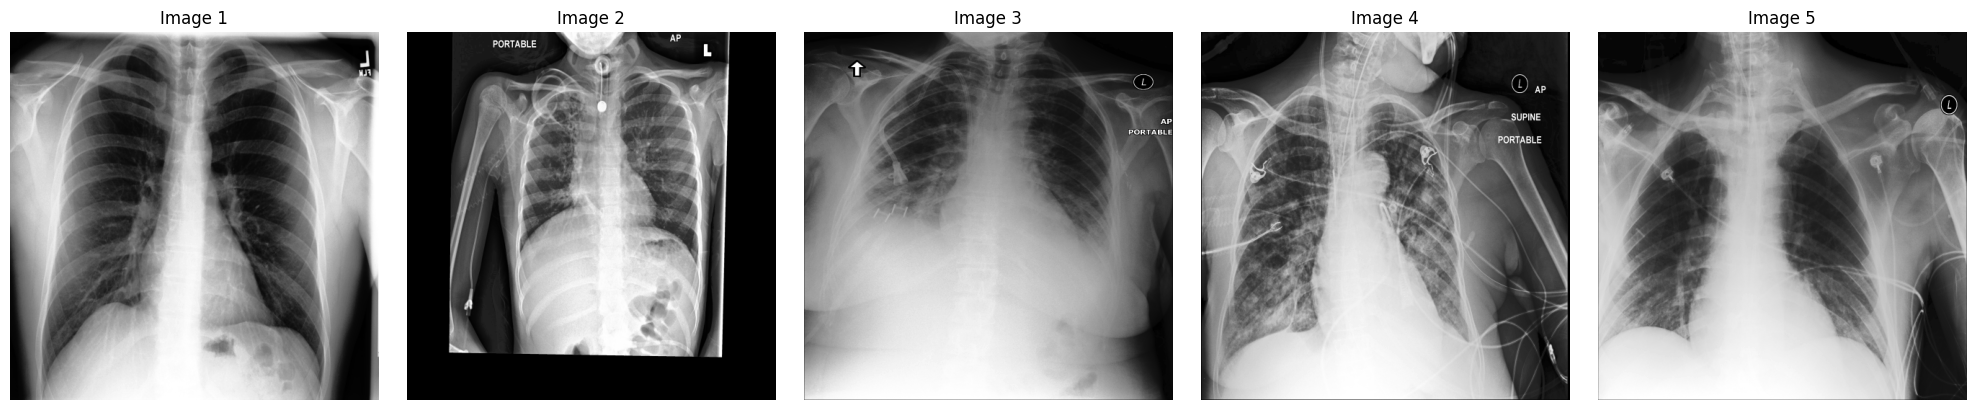

In [1]:
# Import necessary libraries
#!pip install pydicom numpy matplotlib pandas gdcm
#!conda install -c conda-forge gdcm -y

import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to preprocess DICOM images
def preprocess_dicom_image(file_path):
    """
    This function reads a DICOM file, extracts the image data, and normalizes the pixel values.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    np.array: Preprocessed image data
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # Extract image data as a numpy array
    image_data = dicom_file.pixel_array
    
    # Normalize the pixel values to the range 0-1
    image_data = image_data / np.max(image_data)
    
    return image_data

# Directory containing DICOM files
dicom_dir = "dicom_files"

# List all DICOM files in the directory
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith('.dcm')]

# Preprocess and display the first 5 DICOM images
for i, dicom_file in enumerate(dicom_files[:5]):
    # Preprocess the DICOM image
    preprocessed_image = preprocess_dicom_image(dicom_file)
    
    # Display the preprocessed image
    plt.figure()
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title(f'Preprocessed DICOM Image {i+1}')
    plt.axis('off')
    plt.show()

## 3. Metadata Extraction and Exploration


In [3]:
# Function to extract patient gender from DICOM metadata
def extract_patient_gender(file_path):
    """
    This function reads a DICOM file and extracts the patient's gender from the metadata.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    str: Patient's gender (if available)
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # Extract patient gender from metadata (if available)
    if 'PatientSex' in dicom_file:
        return dicom_file.PatientSex
    else:
        return "Unknown"

# List to store patient genders
patient_genders = []

# Extract patient gender from each DICOM file
for dicom_file in dicom_files:
    gender = extract_patient_gender(dicom_file)
    patient_genders.append(gender)

# Display the extracted patient genders
for i, gender in enumerate(patient_genders[:5]):
    print(f'Patient Gender for Image {i+1}: {gender}')


NameError: name 'dicom_files' is not defined

In [33]:
import pandas as pd

# List to store patient metadata
patient_metadata = []

# Extract metadata from each DICOM file
for dicom_file in dicom_files:
    dicom_data = pydicom.dcmread(dicom_file)
    metadata = {
        "File": dicom_file,
        "PatientID": dicom_data.PatientID if 'PatientID' in dicom_data else "Unknown",
        "PatientSex": dicom_data.PatientSex if 'PatientSex' in dicom_data else "Unknown",
        "PatientAge": dicom_data.PatientAge if 'PatientAge' in dicom_data else "Unknown",
    }
    patient_metadata.append(metadata)

# Convert to pandas DataFrame
metadata_df = pd.DataFrame(patient_metadata)

# Display the first 5 rows of the DataFrame
metadata_df.head(20)


,File,PatientID,PatientSex,PatientAge
0,dicom_files\1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027.dcm,17d405a3-a0d2-4901-b33a-63906aa48d9f,M,38
1,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10000.1517875220.938530.dcm,8ab1ffda-8b65-4914-95d6-2e549e328666,F,10
2,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10001.1517875220.930580.dcm,bfef51d3-6541-4792-bac1-d21d41ee60fd,F,50
3,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10002.1517875220.939397.dcm,d19d956f-4ddd-4688-81ff-909c85e0e2d9,F,68
4,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10003.1517875220.942420.dcm,cf71a760-f693-4ccf-acd4-a41ff4845a5f,M,65
5,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10004.1517875220.929537.dcm,3d911758-b2f0-4dff-8165-80c129ffa134,F,45
6,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10005.1517875220.958951.dcm,bf8b1e5d-7ae8-4f5b-a387-8e0bb40733f1,F,53
7,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10006.1517875220.954474.dcm,10520fab-17f0-4b86-ad5e-e4630ee6fca9,M,55
8,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10007.1517875220.954767.dcm,22e25a79-59b2-4e0c-88f3-6baba20c016e,F,26
9,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10008.1517875220.957633.dcm,969a87e0-de36-4038-931f-6daae9027975,M,63


In [34]:
# Function to list all metadata fields in a DICOM file
def list_dicom_metadata(file_path):
    """
    This function reads a DICOM file and lists all metadata fields.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    list: List of all metadata fields
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # List all metadata fields
    metadata_fields = dicom_file.dir()
    
    return metadata_fields

# Choose one DICOM file to explore
dicom_file_to_explore = dicom_files[0]

# Get all metadata fields
metadata_fields = list_dicom_metadata(dicom_file_to_explore)

# Display the total number of metadata fields and list them
print(f'Total metadata fields: {len(metadata_fields)}')
print('Metadata fields:')
for field in metadata_fields:
    print(field)


Total metadata fields: 35
Metadata fields:
AccessionNumber
BitsAllocated
BitsStored
BodyPartExamined
Columns
ConversionType
HighBit
InstanceNumber
LossyImageCompression
LossyImageCompressionMethod
Modality
PatientAge
PatientBirthDate
PatientID
PatientName
PatientOrientation
PatientSex
PhotometricInterpretation
PixelData
PixelRepresentation
PixelSpacing
ReferringPhysicianName
Rows
SOPClassUID
SOPInstanceUID
SamplesPerPixel
SeriesDescription
SeriesInstanceUID
SeriesNumber
SpecificCharacterSet
StudyDate
StudyID
StudyInstanceUID
StudyTime
ViewPosition


In [35]:
# Set to store unique metadata fields
unique_metadata_fields = set()

# Extract metadata fields from each DICOM file
for dicom_file in dicom_files:
    metadata_fields = list_dicom_metadata(dicom_file)
    unique_metadata_fields.update(metadata_fields)

# Display the total number of unique metadata fields and list them
print(f'Total unique metadata fields across all files: {len(unique_metadata_fields)}')
print('Unique metadata fields:')
for field in unique_metadata_fields:
    print(field)


Total unique metadata fields across all files: 35
Unique metadata fields:
StudyID
PatientBirthDate
Columns
BitsAllocated
SOPInstanceUID
PixelData
StudyDate
SOPClassUID
PhotometricInterpretation
BitsStored
PixelRepresentation
StudyTime
SeriesDescription
PatientID
PatientSex
Rows
SeriesNumber
BodyPartExamined
InstanceNumber
ViewPosition
HighBit
SamplesPerPixel
ConversionType
PatientOrientation
Modality
LossyImageCompression
PatientAge
ReferringPhysicianName
PatientName
SeriesInstanceUID
SpecificCharacterSet
StudyInstanceUID
PixelSpacing
LossyImageCompressionMethod
AccessionNumber


In [36]:
list_dicom_metadata(dicom_files[0])

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition']

# TEST ALEX su previsione Gender

In [9]:
import tensorflow as tf

# Check TensorFlow version and GPU availability
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# If 1 or more GPUs are listed, TensorFlow is set up for GPU usage


TensorFlow version: 2.16.2
Num GPUs Available:  0


# MATTEO

In [39]:
patient_metadata = []

# List of metadata fields to extract
metadata_fields = [
    #"AccessionNumber",
    #"BitsAllocated",
    #"BitsStored",
    #"BodyPartExamined",
    #"Columns",
    #"ConversionType",
    #"HighBit",
    #"InstanceNumber",
    #"LossyImageCompression",
    #"LossyImageCompressionMethod",
    #"Modality",
    "PatientAge",
    #"PatientBirthDate",
    "PatientID",
    #"PatientName",
    #"PatientOrientation",
    "PatientSex",
    #"PhotometricInterpretation",
    #"PixelData",
    #"PixelRepresentation",
    "PixelSpacing",
    #"ReferringPhysicianName",
    #"Rows",
    #"SOPClassUID",
    "SOPInstanceUID",
    #"SamplesPerPixel",
    #"SeriesDescription",
    "SeriesInstanceUID",
    #"SeriesNumber",
    #"SpecificCharacterSet",
    #"StudyDate",
    #"StudyID",
    "StudyInstanceUID",
    #"StudyTime",
    
    "ViewPosition",
]

# Extract metadata from each DICOM file
for dicom_file in dicom_files:
    dicom_data = pydicom.dcmread(dicom_file)
    metadata = {"File": dicom_file}
    for field in metadata_fields:
        metadata[field] = getattr(dicom_data, field, "Unknown")
    patient_metadata.append(metadata)

# Convert to pandas DataFrame
metadata_df = pd.DataFrame(patient_metadata)

# Display the first 20 rows of the DataFrame
print(metadata_df.head(20))

# Save the DataFrame as a CSV file
metadata_df.to_csv("dicom_metadata.csv", index=False)

                                                                       File  \
0    dicom_files/1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027.dcm   
1   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10000.1517875220.938530.dcm   
2   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10001.1517875220.930580.dcm   
3   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10002.1517875220.939397.dcm   
4   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10003.1517875220.942420.dcm   
5   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10004.1517875220.929537.dcm   
6   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10005.1517875220.958951.dcm   
7   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10006.1517875220.954474.dcm   
8   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10007.1517875220.954767.dcm   
9   dicom_files/1.2.276.0.7230010.3.1.4.8323329.10008.1517875220.957633.dcm   
10  dicom_files/1.2.276.0.7230010.3.1.4.8323329.10009.1517875220.958288.dcm   
11   dicom_files/1.2.276.0.7230010.3.1.4.8323329.100

In [40]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Display the first row of the DataFrame
print(metadata_df.iloc[0])


File                 dicom_files/1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027.dcm
PatientAge                                                                               38
PatientID                                              17d405a3-a0d2-4901-b33a-63906aa48d9f
PatientSex                                                                                M
PixelSpacing                                                                 [0.168, 0.168]
SOPInstanceUID                       1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027
SeriesInstanceUID                    1.2.276.0.7230010.3.1.3.8323329.1000.1517875165.878025
StudyInstanceUID                     1.2.276.0.7230010.3.1.2.8323329.1000.1517875165.878026
ViewPosition                                                                             PA
Name: 0, dtype: object


CNN SEX CLASSIFICATION

In [26]:
%pip install scikit-learn
import os
import pydicom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/cb/be/dec2a8d31d133034a8ec51ae68ac564ec9bde1c78a64551f1438c3690b9e/scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.9 MB 19.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.9 MB 35.1 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/10.9 MB 4


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
#ALEX
# Assuming dicom_files is a list of DICOM file paths
total_images = len(dicom_files)
chunk_size = 1500
data = []
labels = []

for start_idx in range(0, total_images, chunk_size):
    end_idx = min(start_idx + chunk_size, total_images)
    chunk_data = []
    chunk_labels = []

    for i in range(start_idx, end_idx):
        dicom_data = pydicom.dcmread(dicom_files[i])
        if "PatientSex" in dicom_data:
            image = preprocess_dicom_image(dicom_files[i])
            sex = 1 if dicom_data.PatientSex == "M" else 0
            chunk_data.append(image)
            chunk_labels.append(sex)

    # At this point, chunk_data and chunk_labels contain the processed data for the current chunk
    # You can now save this data to disk or use it for training
    # For example, to append to the overall dataset:
    data.extend(chunk_data)
    labels.extend(chunk_labels)

    # Optionally, save chunk_data and chunk_labels to disk or directly use them for training here

# After the loop, data and labels contain all the processed data and labels

In [13]:
print(f"Total preprocessed records: {len(data)}")

Total preprocessed records: 10719


In [1]:
# # Function to preprocess DICOM images
# def preprocess_dicom_image(file_path):
#     dicom_file = pydicom.dcmread(file_path)
#     image_data = dicom_file.pixel_array
#     image_data = image_data / np.max(image_data)  # Normalize pixel values to 0-1
#     image_data = np.stack((image_data,) * 3, axis=-1)  # Convert to 3-channel image
#     image_data = np.resize(image_data, (128, 128, 3))  # Resize to 128x128
#     return image_data


# # Directory containing DICOM files
# dicom_dir = "dicom_files"

# # List all DICOM files in the directory
# dicom_files = [
#     os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")
# ]

# # List to store patient metadata and images
# data = []
# labels = []


# # Extract metadata and images
# for i in range(0, 5000):  # len(dicom_files)):

#     dicom_data = pydicom.dcmread(dicom_files[i])
#     if "PatientSex" in dicom_data:
#         print("Image n.", i)

#         image = preprocess_dicom_image(dicom_files[i])
#         sex = 1 if dicom_data.PatientSex == "M" else 0
#         data.append(image)
#         labels.append(sex)

NameError: name 'dicom_files' is not defined

In [24]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)


# One-hot encode the labels
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

MemoryError: Unable to allocate 83.7 GiB for an array with shape (10719, 1024, 1024) and data type float64

In [17]:
import numpy as np

# Define the shape and data type for your data and labels
data_shape = (10719, 1024, 1024)
labels_shape = (10719,)
data_dtype = 'float32'
labels_dtype = 'int8'

# Initialize memory-mapped files
data_mm = np.memmap('data.npy', dtype=data_dtype, mode='w+', shape=data_shape)
labels_mm = np.memmap('labels.npy', dtype=labels_dtype, mode='w+', shape=labels_shape)

In [19]:
# Example: Assuming `your_data` and `your_labels` are your datasets loaded in memory
# WARNING: This approach assumes you can fit your_data and your_labels into memory at once.
# If not, you'll need to adapt this to load and write in chunks.

data_mm[:] = data
labels_mm[:] = labels

# It's important to flush changes to disk
data_mm.flush()
labels_mm.flush()

In [20]:
# Re-open the memory-mapped files in read mode
data_mm = np.memmap('data.npy', dtype='float32', mode='r', shape=(10719, 1024, 1024))
labels_mm = np.memmap('labels.npy', dtype='int8', mode='r', shape=(10719,))

In [21]:
import numpy as np
import os

# Assuming data is stored in 'data.npy' and labels in 'labels.npy'
data_path = 'data.npy'
labels_path = 'labels.npy'

# Create memory-mapped files for data and labels
data_mm = np.memmap(data_path, dtype='float32', mode='r', shape=(10719, 1024, 1024))
labels_mm = np.memmap(labels_path, dtype='int8', mode='r', shape=(10719,))

# Now you can access data_mm and labels_mm as if they were numpy arrays, but data is read from disk on-demand

In [26]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_mm, labels_mm, test_size=0.2, random_state=42
)


# One-hot encode the labels
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

MemoryError: Unable to allocate 33.5 GiB for an array with shape (8575, 1024, 1024) and data type float32

In [22]:
## CPU MODEL 
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Build the CNN model
# model = Sequential()

# # Add convolutional layers
# model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D((2, 2)))

# # Flatten the output
# model.add(Flatten())

# # Add dense layers
# model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation="softmax"))

# # Compile the model
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


## MODEL USING GPU AMD Radeon Pro
import os

os.environ["PLAIDML_VERBOSE"] = "1"
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

c:\Users\alexc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'X_train' is not defined

In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Save the model
model.save("models/patient_sex_predictor.h5")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6136 - loss: 0.7444


Test accuracy: 0.6133


# CLAUDE TEST
## Preprocessing

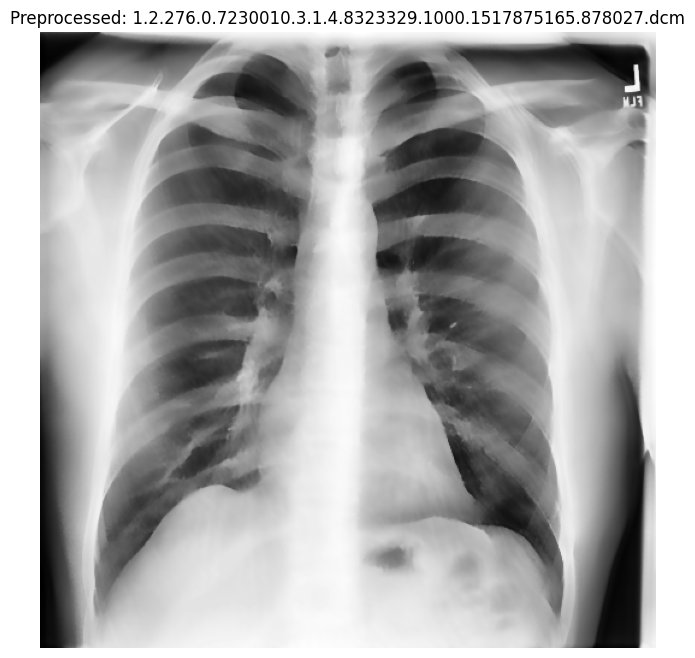

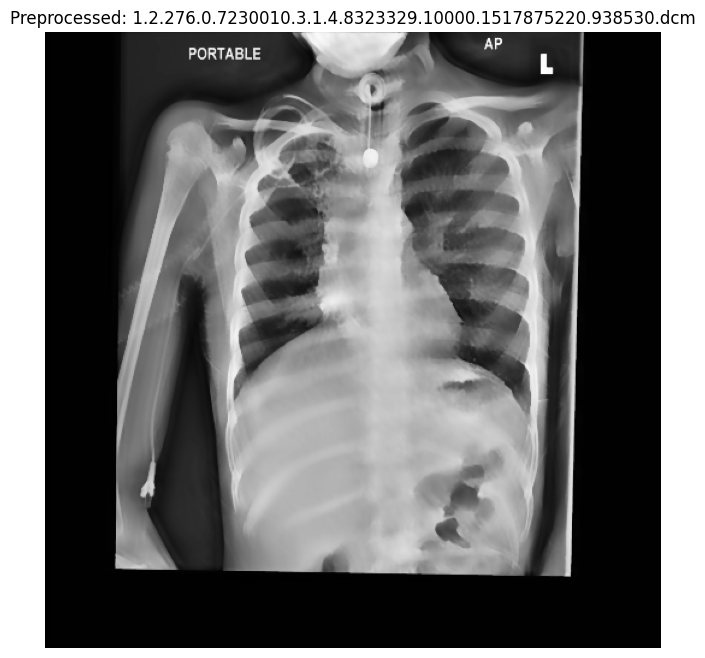

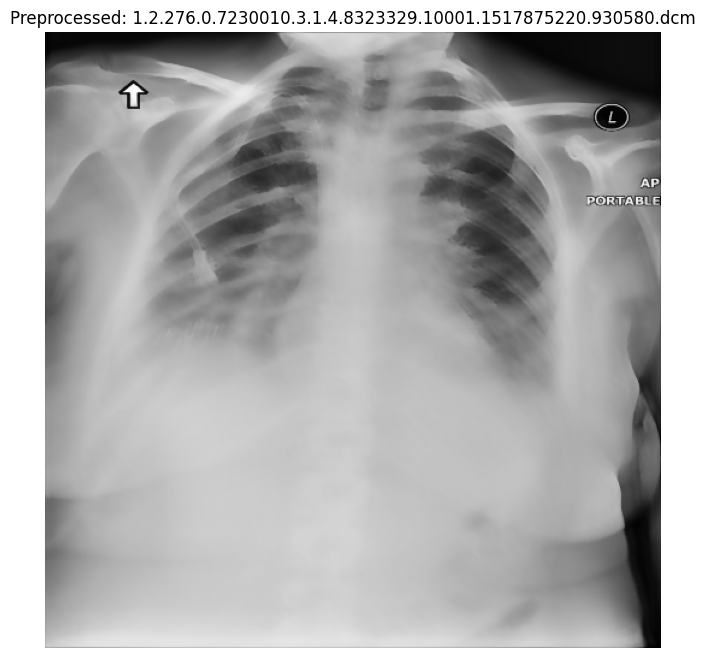

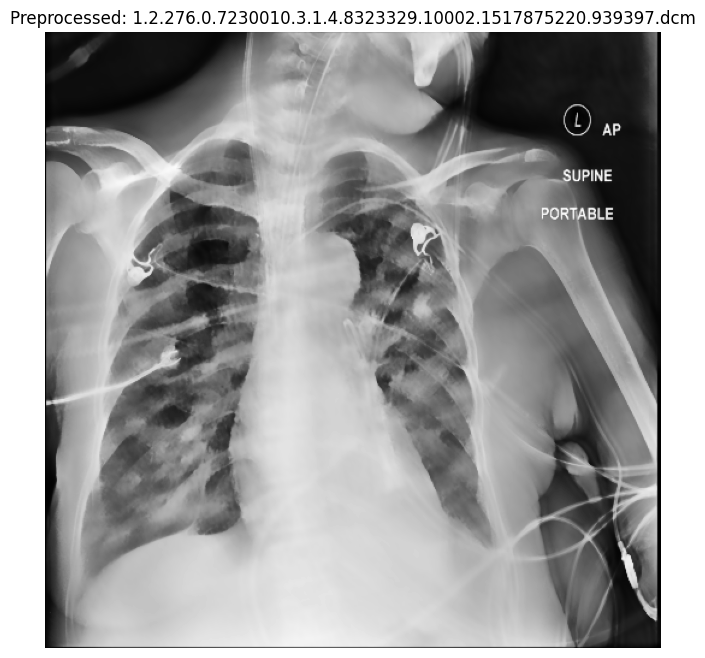

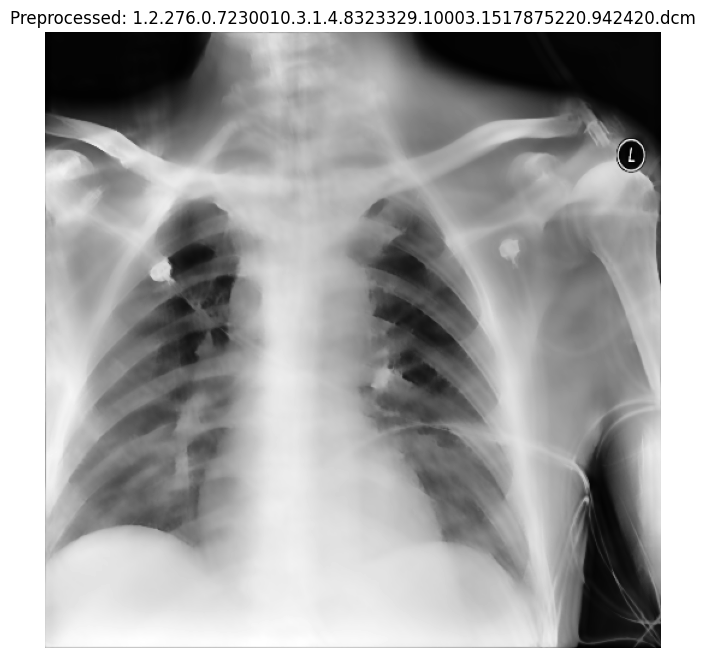

Preprocessed 5 images.


In [41]:
import os
import numpy as np
import pydicom
from skimage import exposure, transform, restoration
import matplotlib.pyplot as plt

def preprocess_dicom(file_path, target_size=(512, 512)):
    """
    Preprocess a single DICOM file.
    
    Args:
    file_path (str): Path to the DICOM file
    target_size (tuple): Target size for resizing (default: (512, 512))
    
    Returns:
    tuple: Preprocessed image array and DICOM metadata
    """
    # Load DICOM file
    dicom = pydicom.dcmread(file_path)
    
    # Extract pixel array and metadata
    image = dicom.pixel_array
    
    # Convert to float and normalize to [0, 1]
    image = image.astype(np.float32) / np.max(image)
    
    # Adjust contrast
    image = exposure.equalize_adapthist(image)
    
    # Resize image
    image = transform.resize(image, target_size, mode='reflect', anti_aliasing=True)
    
    # Apply noise reduction (optional)
    image = restoration.denoise_bilateral(image, sigma_spatial=2, sigma_color=0.1)
    
    return image, dicom

def preprocess_folder(folder_path, num_images=5):
    """
    Preprocess DICOM files in a folder and display the first num_images.
    
    Args:
    folder_path (str): Path to the folder containing DICOM files
    num_images (int): Number of images to display (default: 5)
    
    Returns:
    list: List of tuples containing preprocessed images and their metadata
    """
    preprocessed_data = []
    
    for file_name in os.listdir(folder_path)[:num_images]:
        if file_name.endswith('.dcm'):
            file_path = os.path.join(folder_path, file_name)
            preprocessed_image, metadata = preprocess_dicom(file_path)
            preprocessed_data.append((preprocessed_image, metadata))
            
            # Display the preprocessed image
            plt.figure(figsize=(8, 8))
            plt.imshow(preprocessed_image, cmap='gray')
            plt.title(f"Preprocessed: {file_name}")
            plt.axis('off')
            plt.show()
    
    return preprocessed_data

# Usage
folder_path = "dicom_files"
preprocessed_data = preprocess_folder(folder_path)

print(f"Preprocessed {len(preprocessed_data)} images.")

## Feature Extraction

In [42]:
import os
import numpy as np
import pandas as pd
import pydicom
from skimage import feature
from tqdm import tqdm

def extract_features(dicom_folder):
    features = []
    labels = []
    
    for filename in tqdm(os.listdir(dicom_folder)):
        if filename.endswith('.dcm'):
            file_path = os.path.join(dicom_folder, filename)
            dicom = pydicom.dcmread(file_path)
            
            # Extract metadata features
            metadata_features = {
                'PatientAge': int(dicom.PatientAge) if 'PatientAge' in dicom else -1,
                'PatientWeight': float(dicom.PatientWeight) if 'PatientWeight' in dicom else -1,
                'PatientSize': float(dicom.PatientSize) if 'PatientSize' in dicom else -1,
                'BodyPartExamined': dicom.BodyPartExamined if 'BodyPartExamined' in dicom else 'Unknown',
            }
            
            # Extract image features
            image = dicom.pixel_array
            image = image.astype(np.float32) / np.max(image)
            
            # Calculate histogram of oriented gradients (HOG) features
            hog_features = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            
            # Combine metadata and image features
            combined_features = np.concatenate([
                [metadata_features['PatientAge'], metadata_features['PatientWeight'], metadata_features['PatientSize']],
                hog_features
            ])
            
            features.append(combined_features)
            
            # Extract label (patient sex)
            sex = dicom.PatientSex if 'PatientSex' in dicom else 'Unknown'
            labels.append(sex)
    
    return np.array(features), np.array(labels)

# Usage
dicom_folder = "dicom_files"
X, y = extract_features(dicom_folder)

# Convert to DataFrame for easier handling
feature_names = ['Age', 'Weight', 'Size'] + [f'HOG_{i}' for i in range(X.shape[1] - 3)]
df = pd.DataFrame(X, columns=feature_names)
df['Sex'] = y

print(df.head())
print(f"Total samples: {len(df)}")
print(f"Feature distribution:\n{df['Sex'].value_counts(normalize=True)}")

 43%|████▎     | 4594/10719 [28:39<38:12,  2.67it/s]  


KeyboardInterrupt: 

# Tensorflow GPU set

In [4]:
import torch
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")


ModuleNotFoundError: No module named 'torch'

In [2]:
# Import and print TF version
import tensorflow as tf
print(tf.__version__)

# Check available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Set TensorFlow to only use the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        
        # Optionally, set memory growth to true to only allocate necessary GPU memory
        tf.config.experimental.set_memory_growth(gpus[0], True)
        
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU found, using CPU instead.")

2.16.2
No GPU found, using CPU instead.
